/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


                  Low       Open      Close      Volume  Adj Close
Date                                                              
2010-01-04  68.190002  68.720001  69.150002  27809100.0  48.404034
2010-01-05  68.800003  69.190002  69.419998  30174700.0  48.593029
2010-01-06  69.339996  69.449997  70.019997  35044700.0  49.013016
2010-01-07  69.419998  69.900002  69.800003  27192100.0  48.859024
2010-01-08  69.220001  69.690002  69.519997  24891800.0  48.663021


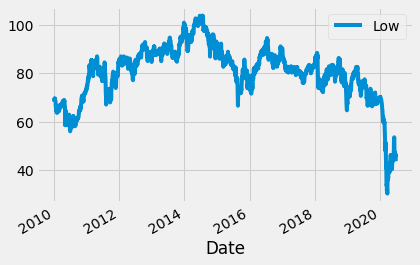

   Day  Visitors  Bounce Rate
0    1        43           65
1    2        34           67
2    3        65           78
3    4        56           65
4    5        29           45
   Day  Visitors  Bounce Rate
1    2        34           67
2    3        65           78
3    4        56           65
4    5        29           45
5    6        76           52
   Day  Visitors  Bounce Rate
4    5        29           45
5    6        76           52
Day
1    43
2    34
3    65
4    56
5    29
6    76
Name: Visitors, dtype: int64


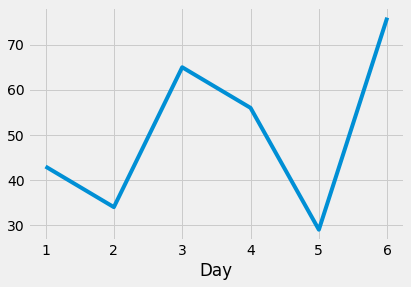

     Visitors  Bounce Rate
Day                       
1          43           65
2          34           67
3          65           78
4          56           65
5          29           45
6          76           52


HTTPError: ignored

In [3]:
#1 Basics
import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime.now()
df = web.DataReader("XOM", "yahoo", start, end)

# Exxon Mobil Corporation (XOM) from Yahoo Finance
Symbol = 'High'
df.reset_index(inplace=True) # create index for each record
df.set_index("Date", inplace=True)
df = df.drop(Symbol,axis=1)
print(df.head())
df['Low'].plot()
plt.legend()
plt.show()

#2
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df = pd.DataFrame(web_stats)
print(df.head())
print(df.tail())
print(df.tail(2))
df.set_index('Day', inplace=True)
style.use('fivethirtyeight')
print(df['Visitors'])
df['Visitors'].plot()
plt.show()
print(df[['Visitors','Bounce Rate']])

#3. Pandas I/O
import pandas as pd

# Download file from someone's github
url = 'https://raw.githubusercontent.com/Pranjali-Sarap/Pandas/master/ZILLZ77006_3B.csv'
df = pd.read_csv(url, error_bad_lines=False)
print(df.head())
df.set_index('Date', inplace = True)

# Save file to your google drive
from google.colab import drive
drive.mount('/content/drive')
data_path = "/content/drive/My Drive/Colab Notebooks/"
with open(data_path + 'newcsv2.csv', 'w') as f:
  df.to_csv(f)

df = pd.read_csv(data_path +'newcsv2.csv')
print('\nnewcsv2.csv from my drive\n', df.head())
df = pd.read_csv(data_path +'newcsv2.csv', index_col=0)

# index_col=0: disable index column
print(df.head())
df.columns = ['House_Prices']
print(df.head())
with open(data_path + 'newcsv3.csv', 'w') as f:
  df.to_csv(f)

df = pd.read_csv(data_path + 'newcsv3.csv', names = ['Date','House_Price'], index_col=0)
print('\nnewcsv3.csv from my drive\n', df.head())
with open(data_path + 'newcsv4.csv', 'w') as f:
  df.to_csv(f, header=False)

df = pd.read_csv(data_path + 'newcsv4.csv', names = ['Date','House_Price'], index_col=0)
print('\nnewcsv4.csv from my drive\n', df.head())

#4 Concatenating and Appending dataframes
df1 = pd.DataFrame({'HPI':[80,85,88,85],
  'Int_rate':[2, 3, 2, 2],
  'US_GDP_Thousands':[50, 55, 65, 55]},

index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
  'Int_rate':[2, 3, 2, 2],
  'US_GDP_Thousands':[50, 55, 65, 55]},

index = [2005, 2006, 2007, 2008])
df3 = pd.DataFrame({'HPI':[80,85,88,85],
  'Int_rate':[2, 3, 2, 2],
  'Low_tier_HPI':[50, 52, 50, 53]},

index = [2001, 2002, 2003, 2004])
concat = pd.concat([df1,df2])
print(concat)
concat = pd.concat([df1,df2,df3])
print(concat)
df4 = df1.append(df2)
print(df4)
s = pd.Series([80,2,50], index=['HPI','Int_rate','US_GDP_Thousands'])
df4 = df1.append(s, ignore_index=True)
print(df4)

#5 Joining and Merging Dataframes
df1 = pd.DataFrame({'HPI':[80,85,88,85],
  'Int_rate':[2, 3, 2, 2],
  'US_GDP_Thousands':[50, 55, 65, 55]},

index = [2001, 2002, 2003, 2004])
df2 = pd.DataFrame({'HPI':[80,85,88,85],
  'Int_rate':[2, 3, 2, 2],
  'US_GDP_Thousands':[50, 55, 65, 55]},
index = [2005, 2006, 2007, 2008])
df3 = pd.DataFrame({'HPI':[80,85,88,85],
  'Unemployment':[7, 8, 9, 6],
  'Low_tier_HPI':[50, 52, 50, 53]},
index = [2001, 2002, 2003, 2004])
print(pd.merge(df1,df3, on='HPI'))
print(pd.merge(df1,df2, on=['HPI','Int_rate']))
df4 = pd.merge(df1,df3, on='HPI')
df4.set_index('HPI', inplace=True)
print(df4)
df1.set_index('HPI', inplace=True)
df3.set_index('HPI', inplace=True)
joined = df1.join(df3)
print(joined)
# let's consider joining and merging on slightly differing indexes
df1 = pd.DataFrame({
  'Int_rate':[2, 3, 2, 2],
  'US_GDP_Thousands':[50, 55, 65, 55],
  'Year':[2001, 2002, 2003, 2004]
})

df3 = pd.DataFrame({
  'Unemployment':[7, 8, 9, 6],
  'Low_tier_HPI':[50, 52, 50, 53],
  'Year':[2001, 2003, 2004, 2005]})

merged = pd.merge(df1,df3, on='Year')
print(merged)
merged = pd.merge(df1,df3, on='Year')
merged.set_index('Year', inplace=True)
print(merged)
merged = pd.merge(df1,df3, on='Year', how='left')
merged.set_index('Year', inplace=True)
print(merged)
merged = pd.merge(df1,df3, on='Year', how='right')
merged.set_index('Year', inplace=True)
print(merged)
merged = pd.merge(df1,df3, on='Year', how='outer')
merged.set_index('Year', inplace=True)
print(merged)
merged = pd.merge(df1,df3, on='Year', how='inner')
merged.set_index('Year', inplace=True)
print(merged)
df1.set_index('Year', inplace=True)
df3.set_index('Year', inplace=True)
joined = df1.join(df3, how="outer")
print(joined)